# Классификация на нейросети


**ЗАДАНИЕ 6**

Необходимо обучить нейронную сеть определять цифру на изображении по заданному вектору.

## Импортируем необходимые библиотеки

In [1]:
import numpy as np
import pandas as pd
import scipy.stats
import warnings
warnings.filterwarnings("ignore")

## Импортируем dataset

In [2]:
url = 'https://drive.google.com/file/d/1MKLgXROpwhxYtpUCNAQJFy15wx9f5fcH/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
train_df = pd.read_csv(url)
train_df.head() 

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
url = 'https://drive.google.com/file/d/1NyRefATX7cqz3IEmO_mIJgsURk72LbOM/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
test_df = pd.read_csv(url)
test_df.head() 

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## train_data, val_data

In [4]:
train_df.iloc[:,1:].loc[0].to_numpy()

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 188, 255,  94,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 191, 250, 253,  93,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [5]:
train_df.label

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [6]:
train_x = train_df.to_numpy()[:,1:]
train_y = train_df.to_numpy()[:,:1]
print('train_x.shape', train_x.shape)
print('train_y.shape', train_y.shape)

train_x.shape (42000, 784)
train_y.shape (42000, 1)


In [7]:
train_y

array([[1],
       [0],
       [1],
       ...,
       [7],
       [6],
       [9]])

In [8]:
np.unique(train_x)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [9]:
np.unique(train_y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# Разделяем данные на тренеровачную и обучающую
train_data, val_data = train_test_split(train_df, test_size = .2,  random_state=8,  stratify=train_df.label)

In [12]:
import torch
import matplotlib.pyplot as plt
from torchvision import transforms
import torch.utils.data as data

## CustomDataset

In [13]:
# для работы с датасетом
class CustomDataset(data.Dataset):
  def __init__(self, data, transforms=None, test = False):
    
    self.transforms = transforms
    self.test = test

    if not self.test:
      # получаем датасет
      self.x = data.iloc[:,1:].to_numpy()
      self.labels = data.label.to_numpy()
    else:
      # получаем датасет
      self.x = data.to_numpy()

  def __getitem__(self, index):
    # получаем вектор
    image = self.x[index]
    # нормализуем
    image= image/255.
    # меняем форму в картинку
    image = np.reshape(image, (28, 28, 1))

    if self.transforms:
      image = self.transforms(image)
    trainX = image

    if self.test:
      return trainX

    else:
      # получаем метку
      trainY = self.labels[index]
      return trainX, trainY

  def __len__(self):
    return len(self.x)

In [14]:
# преобразуем датасет, как необходимо по заданию
transform = transforms.Compose([
                                transforms.ToTensor(),    # перевод в тензор                    
                                #transforms.Grayscale(),   # перевод в черно-серо-белый 
                                #transforms.Resize((56,104)) # периводим картинки к размеру
])

In [15]:
# Информация о датасете
customData_train = CustomDataset(train_data, transform)
print(len(customData_train))

# Информация о датасете
customData_val = CustomDataset(val_data, transform)
print(len(customData_val))

33600
8400


In [16]:
# Создадим dataloader
batchSize = 32
trainLoader = torch.utils.data.DataLoader(dataset=customData_train,
                                          batch_size=batchSize,
                                          shuffle=True)
                                          #num_workers=4)

valLoader = torch.utils.data.DataLoader(dataset=customData_val,
                                          batch_size=batchSize,
                                          shuffle=True)
                                          #num_workers=4)                                          

метка 9


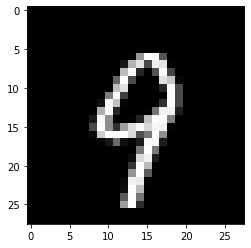

In [17]:
# Посмотрим на пример генерации
dataiter = iter(trainLoader)
# Изобразим элемент выборкиc
images, labels = dataiter.next()
print(f'метка {labels[0]}')
plt.imshow(images[0].squeeze(), cmap = 'Greys_r');

## Модель

In [18]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.conv_layers = torch.nn.Sequential(
            torch.nn.Conv2d(1, 16, kernel_size=2),
            torch.nn.MaxPool2d(2),
            torch.nn.ReLU(),
            torch.nn.Conv2d(16, 32, kernel_size=3),
            torch.nn.Dropout(),
            torch.nn.MaxPool2d(4),
            torch.nn.ReLU(),
        )
        self.fc_layers = torch.nn.Sequential(
            torch.nn.Linear(128, 64),
            torch.nn.ReLU(),
            torch.nn.Dropout(),
            torch.nn.Linear(64, 10),
            torch.nn.Softmax(dim=1)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(-1, 128)
        x = self.fc_layers(x)
        return x

In [19]:
device = 'cuda' if torch.cuda.is_available() else 'cpu' # Если доступна видеокарта, то обучение на ней быстрее
model = Net().to(device) # При обучении на гпу модель должна храниться на гпу

## Визуализация модели

In [20]:
!pip install torchviz -q
from torchviz import make_dot
from torchsummary import summary

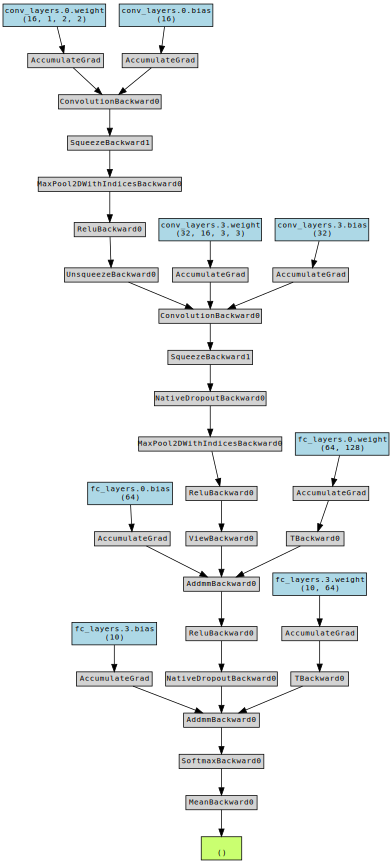

In [21]:
output = model.forward(images[0].to(device, dtype=torch.float32))
make_dot(output.mean(), params=dict(model.named_parameters()))

# Обучение

In [22]:
learning_rate = 0.001
num_epochs = 20

device = 'cuda' if torch.cuda.is_available() else 'cpu' # Если доступна видеокарта, то обучение на ней быстрее
model = Net().to(device) # При обучении на гпу модель должна храниться на гпу

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [23]:
## вычисление точности
def get_accuracy(logit, target, batch_size):
    ''' Obtain accuracy for training round '''
    corrects = (torch.max(logit, 1)[1].view(target.size()).data == target.data).sum()
    accuracy = 100.0 * corrects/batch_size
    return accuracy.item()

Обучение с проверкой

In [24]:
train_acc_hist = [] # для отрисовки
val_acc_hist = [] # # для отрисовки

for epoch in range(num_epochs):
    train_running_loss = 0.0
    train_acc = 0.0

    model = model.train()
    ## training step
    for i, (images, labels) in enumerate(trainLoader):
        
        images = images.to(device, dtype=torch.float32)
        labels = labels.to(device)

        ## forward + backprop + loss
        logits = model(images)
        loss = criterion(logits, labels)
        # Очищаем градиенты с прошлого шага
        optimizer.zero_grad()
        loss.backward()

        ## update model params
        optimizer.step()

        train_running_loss += loss.detach().item()
        train_acc += get_accuracy(logits, labels, batchSize)

    # На валидации не нужно считать градиенты
    with torch.no_grad():
        model.eval()
        val_acc = 0.0
        val_running_loss =  0.0
        for j, (images, labels) in enumerate(valLoader, 0):
            images = images.to(device, dtype=torch.float32)
            labels = labels.to(device)
            outputs = model(images)
            val_loss = criterion(outputs, labels)

            val_running_loss += val_loss.detach().item()
            val_acc += get_accuracy(outputs, labels, batchSize)
    train_acc_eph = round(train_acc/i,2)
    val_acc_eph = round(val_acc/j,2)

    print(f'Epoch: {epoch} | Loss: {round(train_running_loss / i, 3)} | Accuracy: {train_acc_eph}' \
          f' ---- Val Loss: {round(val_running_loss / j, 3)} | Val Accuracy: {val_acc_eph}'
          )      
    train_acc_hist.append(train_acc_eph)
    val_acc_hist.append(val_acc_eph)

Epoch: 0 | Loss: 1.896 | Accuracy: 57.81 ---- Val Loss: 1.657 | Val Accuracy: 85.42
Epoch: 1 | Loss: 1.673 | Accuracy: 79.69 ---- Val Loss: 1.59 | Val Accuracy: 89.41
Epoch: 2 | Loss: 1.635 | Accuracy: 83.31 ---- Val Loss: 1.571 | Val Accuracy: 90.59
Epoch: 3 | Loss: 1.613 | Accuracy: 85.52 ---- Val Loss: 1.553 | Val Accuracy: 92.25
Epoch: 4 | Loss: 1.601 | Accuracy: 86.54 ---- Val Loss: 1.545 | Val Accuracy: 93.0
Epoch: 5 | Loss: 1.59 | Accuracy: 87.65 ---- Val Loss: 1.541 | Val Accuracy: 93.21
Epoch: 6 | Loss: 1.585 | Accuracy: 88.02 ---- Val Loss: 1.533 | Val Accuracy: 93.91
Epoch: 7 | Loss: 1.58 | Accuracy: 88.42 ---- Val Loss: 1.531 | Val Accuracy: 94.18
Epoch: 8 | Loss: 1.571 | Accuracy: 89.33 ---- Val Loss: 1.532 | Val Accuracy: 93.95
Epoch: 9 | Loss: 1.567 | Accuracy: 89.76 ---- Val Loss: 1.53 | Val Accuracy: 93.94
Epoch: 10 | Loss: 1.566 | Accuracy: 89.94 ---- Val Loss: 1.521 | Val Accuracy: 94.97
Epoch: 11 | Loss: 1.562 | Accuracy: 90.27 ---- Val Loss: 1.523 | Val Accuracy: 9

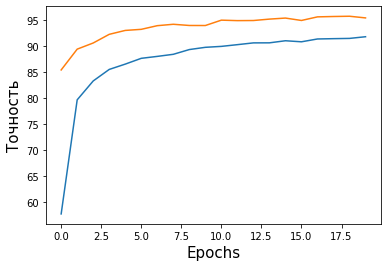

In [25]:
import matplotlib.pyplot as plt

plt.plot(range(num_epochs), train_acc_hist)
plt.plot(range(num_epochs), val_acc_hist)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Точность", fontsize=15)
plt.show()

#Test

In [30]:
# Информация о датасете
customData_test = CustomDataset(test_df, transform, test = True)
print(len(customData_test))

testLoader = torch.utils.data.DataLoader(dataset=customData_test,
                                          batch_size=len(test_df),
                                          shuffle=True)
                                          #num_workers=4)     

28000


## Тест

 Сете определила цифру 6



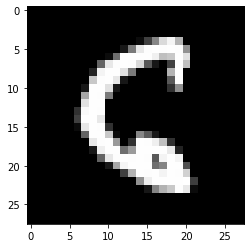

In [31]:
# Посмотрим на пример генерации
dataiter = iter(testLoader)
# Изобразим элемент выборкиc
images = dataiter.next()
idx = np.random.randint(0, len(test_df))
img = images[idx]
plt.imshow(img.squeeze(), cmap = 'Greys_r');
device = 'cpu' 
model = model.to(device)
out = model(img.to(device, dtype=torch.float32))
print(f' Сете определила цифру {torch.argmax(out).numpy()}')
print()

## SHAP для интерпритации
для изучения

Shap Value : Deep Explainer
[official documentation](https://shap.readthedocs.io/en/latest/#shap.DeepExplainer)

Meant to approximate SHAP values for deep learning models.

This is an enhanced version of the DeepLIFT algorithm (Deep SHAP) where, similar to Kernel SHAP, we approximate the conditional expectations of SHAP values using a selection of background samples. Lundberg and Lee, NIPS 2017 showed that the per node attribution rules in DeepLIFT (Shrikumar, Greenside, and Kundaje, arXiv 2017) can be chosen to approximate Shapley values. By integrating over many backgound samples DeepExplainer estimates approximate SHAP values such that they sum up to the difference between the expected model output on the passed background samples and the current model output (f(x) - E[f(x)]).

shap_values(X, ranked_outputs=None, output_rank_order='max')

Return approximate SHAP values for the model applied to the data given by X.

X :list,

if framework == ‘tensorflow’: numpy.array, or pandas.DataFrame if framework == ‘pytorch’: torch.tensor A tensor (or list of tensors) of samples (where X.shape[0] == # samples) on which to explain the model’s output.

ranked_outputs :None or int

If ranked_outputs is None then we explain all the outputs in a multi-output model. If ranked_outputs is a positive integer then we only explain that many of the top model outputs (where “top” is determined by output_rank_order). Note that this causes a pair of values to be returned (shap_values, indexes), where shap_values is a list of numpy arrays for each of the output ranks, and indexes is a matrix that indicates for each sample which output indexes were choses as “top”.

output_rank_order :“max”, “min”, or “max_abs”

How to order the model outputs when using ranked_outputs, either by maximum, minimum, or maximum absolute value. For a models with a single output this returns a tensor of SHAP values with the same shape as X. For a model with multiple outputs this returns a list of SHAP value tensors, each of which are the same shape as X. If ranked_outputs is None then this list of tensors matches the number of model outputs. If ranked_outputs is a positive integer a pair is returned (shap_values, indexes), where shap_values is a list of tensors with a length of ranked_outputs, and indexes is a matrix that indicates for each sample which output indexes were chosen as “top”.

In [32]:
!pip install shap -q
import shap

In [33]:
# since shuffle=True, this is a random sample of test data
batch = next(iter(testLoader))
images = batch

device = 'cpu' 
background = images[:27]
background = background.to(device, dtype=torch.float32)
test_images = images[27:batchSize]
test_images = test_images.to(device, dtype=torch.float32)

model = model.to(device)

e = shap.DeepExplainer(model, background)
shap_values = e.shap_values(test_images)

In [34]:
shap_numpy = [np.swapaxes(np.swapaxes(s, 1, -1), 1, 2) for s in shap_values]
test_numpy = np.swapaxes(np.swapaxes(test_images.numpy(), 1, -1), 1, 2)

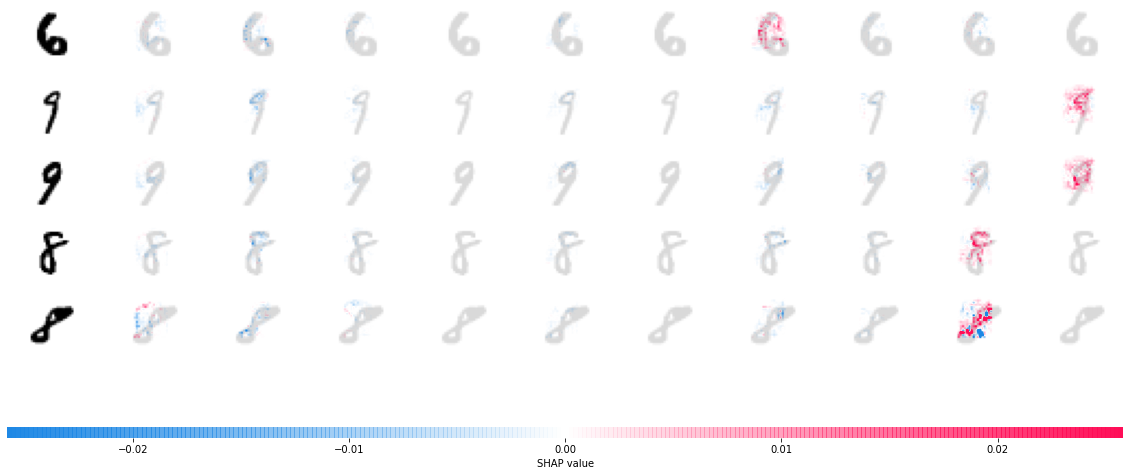

In [35]:
# plot the feature attributions
shap.image_plot(shap_numpy, -test_numpy)